date                 datetime64[ns]
opens                         int64
messages_received             int64
messages_sent                 int64
likes                         int64
passes                        int64
matches                       int64
dtype: object
-----------------------------------------------------


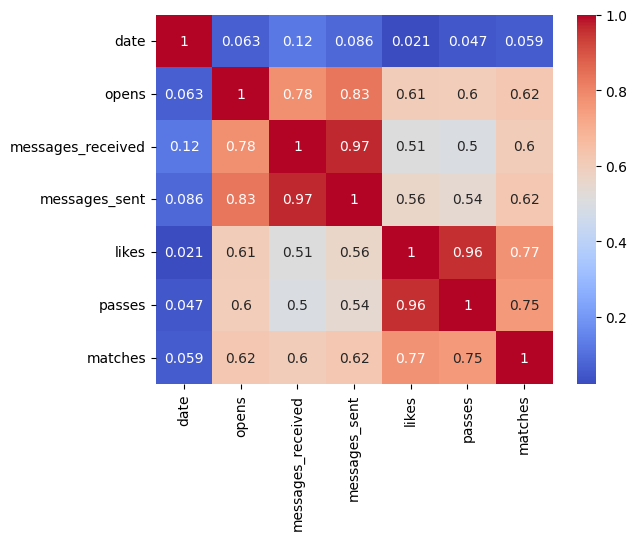

ALL FEATURES:
                            OLS Regression Results                            
Dep. Variable:                matches   R-squared:                       0.659
Model:                            OLS   Adj. R-squared:                  0.658
Method:                 Least Squares   F-statistic:                     561.0
Date:                Tue, 29 Oct 2024   Prob (F-statistic):               0.00
Time:                        19:54:10   Log-Likelihood:                -4439.1
No. Observations:                1457   AIC:                             8890.
Df Residuals:                    1451   BIC:                             8922.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 2.

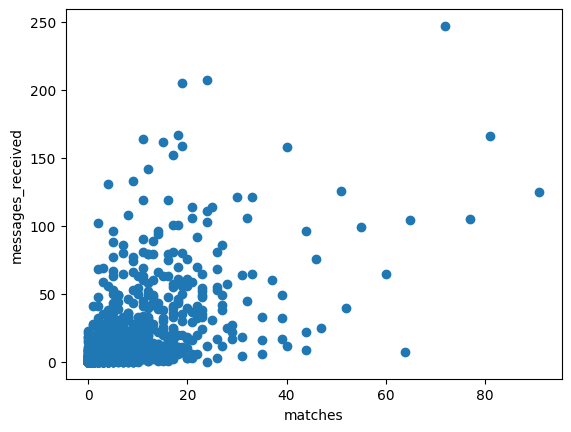

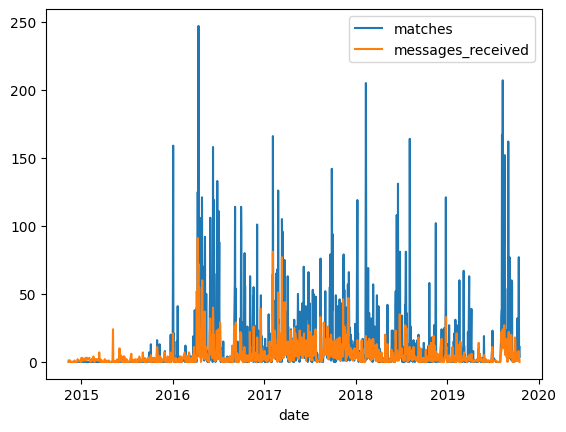

In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Load the data
data = pd.read_csv('bentinder.csv')

# drop first column
data = data.drop('Unnamed: 0', axis=1)
data.head()

# convert the data type (string fromat y-m-d) to a datetime object
data['date'] = pd.to_datetime(data['date'])
print(data.dtypes)

print("-----------------------------------------------------")
# print the correlation matrix heatmap
corr = data.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

# linear regression of all the features
x = data.drop(['matches', 'date'], axis=1)
y = data['matches']

x = sm.add_constant(x)
model = sm.OLS(y, x).fit()
print("ALL FEATURES:")
print(model.summary())

print("-----------------------------------------------------")
# drop the messahe_sent column
x = x.drop('messages_sent', axis=1)
model = sm.OLS(y, x).fit()

print("WITHOUT MESSAGES SENT:")
print(model.summary())
print("-----------------------------------------------------")

# drop the opens column
x = x.drop('opens', axis=1)
model = sm.OLS(y, x).fit()

print("WITHOUT OPENS:")
print(model.summary())
print("-----------------------------------------------------")

# drop the passes column
x = x.drop('passes', axis=1)

model = sm.OLS(y, x).fit()
print("WITHOUT PASSES:")
print(model.summary())
print("-----------------------------------------------------")

# plot of the matches vs messages_received
plt.scatter(data['matches'], data['messages_received'])
plt.xlabel('matches')
plt.ylabel('messages_received')
plt.show()

# plot the date vs messages_received and matches
plt.plot(data['date'], data['messages_received'])
plt.xlabel('date')

plt.plot(data['date'], data['matches'])
plt.xlabel('date')
plt.legend(['matches', 'messages_received'])
plt.show()

